# Laboratory Session 03

## Exercise 1
The triangular distribution, in the interval $(a, b)$, is given by the following:
$$
\begin{align}
f(X) =\left\{
\begin{array}\\
\frac{2(x − a)}{(b − a)(c − a)}, &a ≤ x < c\\
\frac{2(b − x)}{(b − a)(b − c)}. &c ≤ x ≤ b\\
0 &\text{otherwise}
\end{array}
\right.
\end{align}
$$
where $c \in [a, b]$.

In [1]:
g <- function(x,a,b,c){
    2*(x-a)/((b-a)*(c-a))*(a <= x & x < c) + 2*(b-x)/((b-a)*(b-c))*(c <= x & x <= b)
}
f <- function(x){g(x,1,3,2)}

### a) Plot the function, given the interval (a, b)

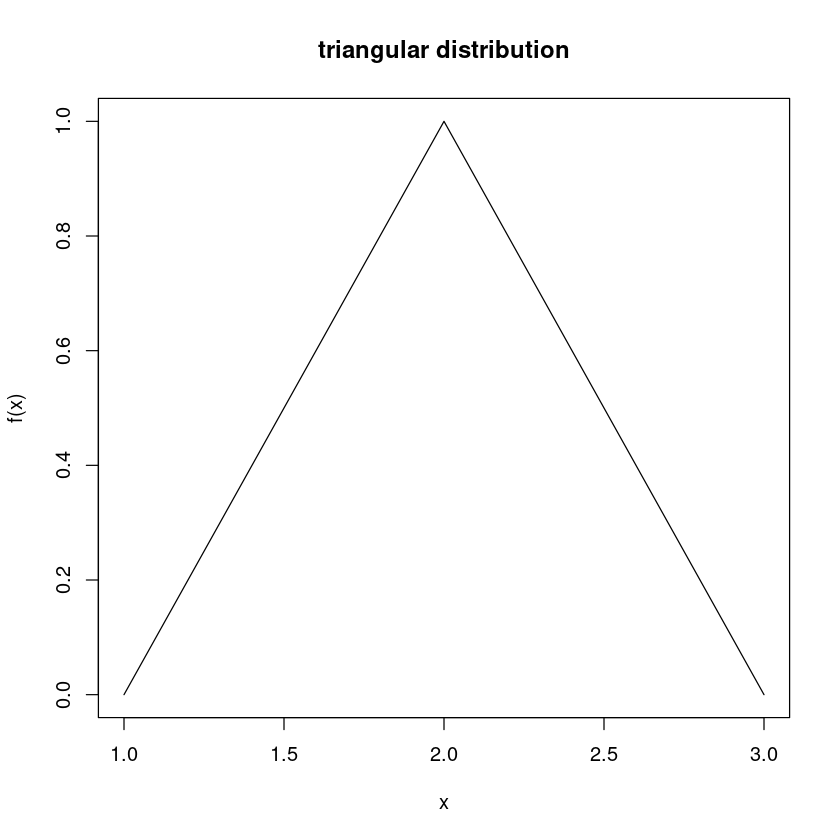

In [2]:
x <- seq(1,3,0.05)
plot(x,f(x), type = 'l',main = 'triangular distribution')

### b) Write an algorithm to generate random numbers from the triangular distribution

In [3]:
# sampling by accept/reject method
sample_f <- function(f, a, b, N = 1){
    n_missing <- N
    x <- c()
    while(n_missing > 0){
        # Generate N samples
        x_n <- runif(n_missing,a,b)
        # slicer of accepted values
        accepted <- runif(n_missing) < f(x_n)
        if(any(accepted)){
            # concatenate if anything can be added.
            x <- c(x, x_n[accepted])
            n_missing <- N-length(x)
        }
    }
    return(x)
}

### c) Generate $10^4$ random numbers from the distribution, show them in an histogram and superimpose the analytical curve

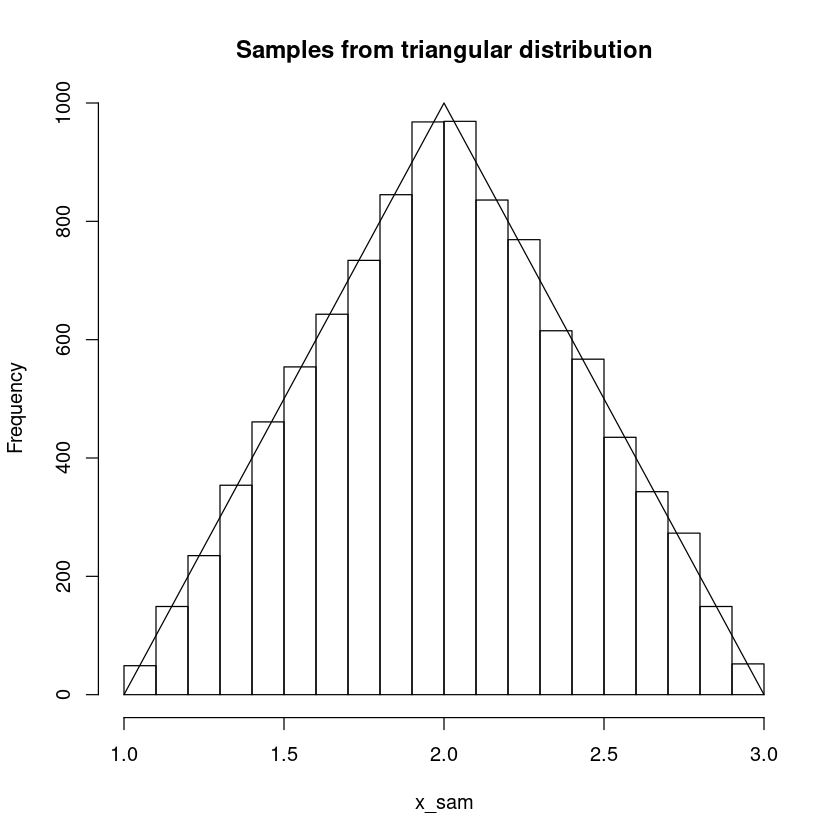

In [4]:
x_sam <- sample_f(f,1,3,10000)
hist(x_sam, main = 'Samples from triangular distribution')
lines(x,1000*f(x))

## Markov's inequality
Markov's inequality represents an upper bound to probability distributions:
$$
\begin{align}
P(X\ge k) \le \frac{\text{E}\left[X\right]}{k},\ k>0 
\end{align}
$$
Having defined a function $G(k) \equiv 1-F(k)=P(X\ge k)$, plot $G(k)$ and the Markov's upper bound for:

### a) the exponential, Exp(λ = 1), distribution function

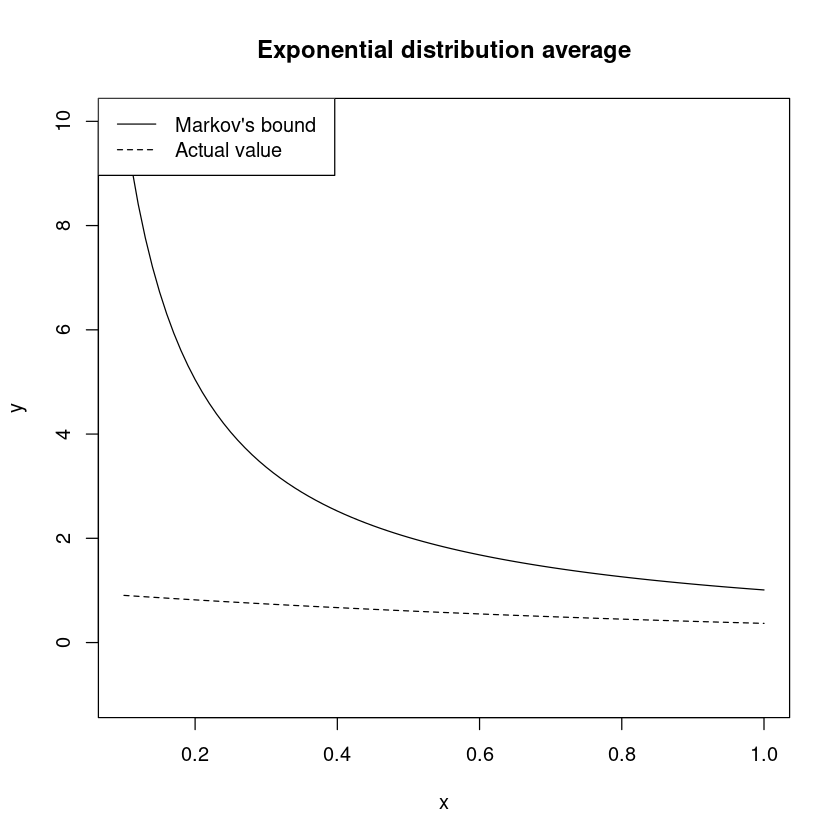

In [5]:
g_k <- function(x){1-pexp(x,1)}
avg <- mean(rexp(10000,1))
x <- seq(0.1,1,0.01)
y <- avg/x
plot(x, y, ylim = c(-1,10), main = 'Exponential distribution average', type = 'l',lty =1)
lines(x, g_k(x), lty = 2)
legend("topleft",legend = c("Markov's bound","Actual value"), lty =1:2)

### b) the uniform, U(3, 5), distribution function

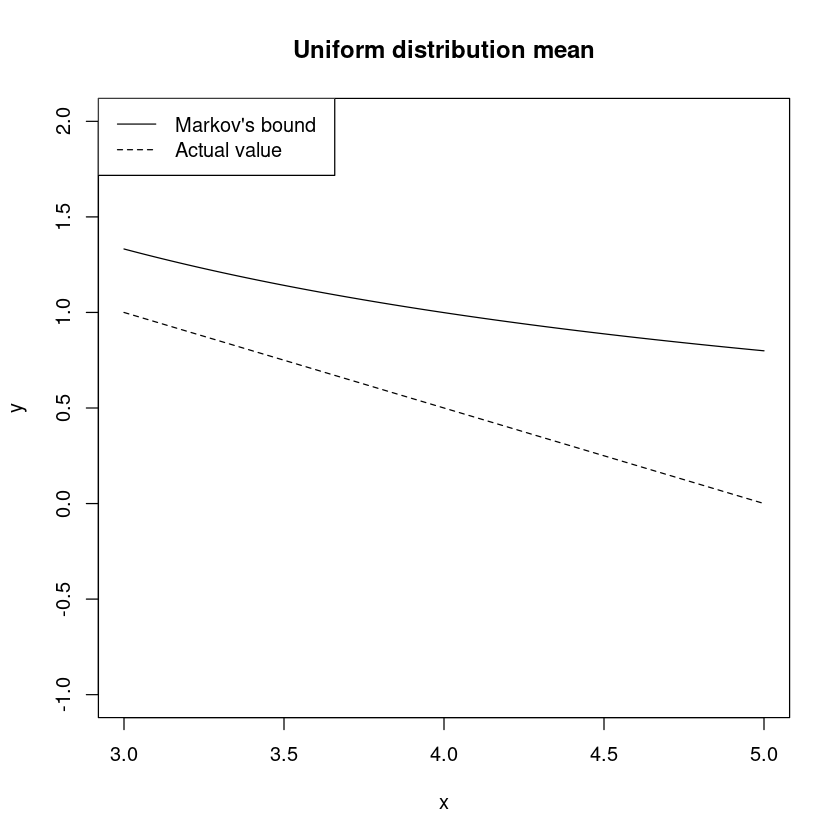

In [6]:
g_k <- function(x){1-punif(x,3,5)}
avg <- mean(runif(10000,3,5))
x <- seq(3,5,0.01)
y <- avg/x
plot(x, y, ylim = c(-1,2), main = 'Uniform distribution mean', type= 'l',lty = 1)
lines(x, g_k(x), lty = 2)
legend("topleft",legend = c("Markov's bound","Actual value"), lty =1:2)

### c) the binomial, Bin(n = 1, p = 1/2), distribution function

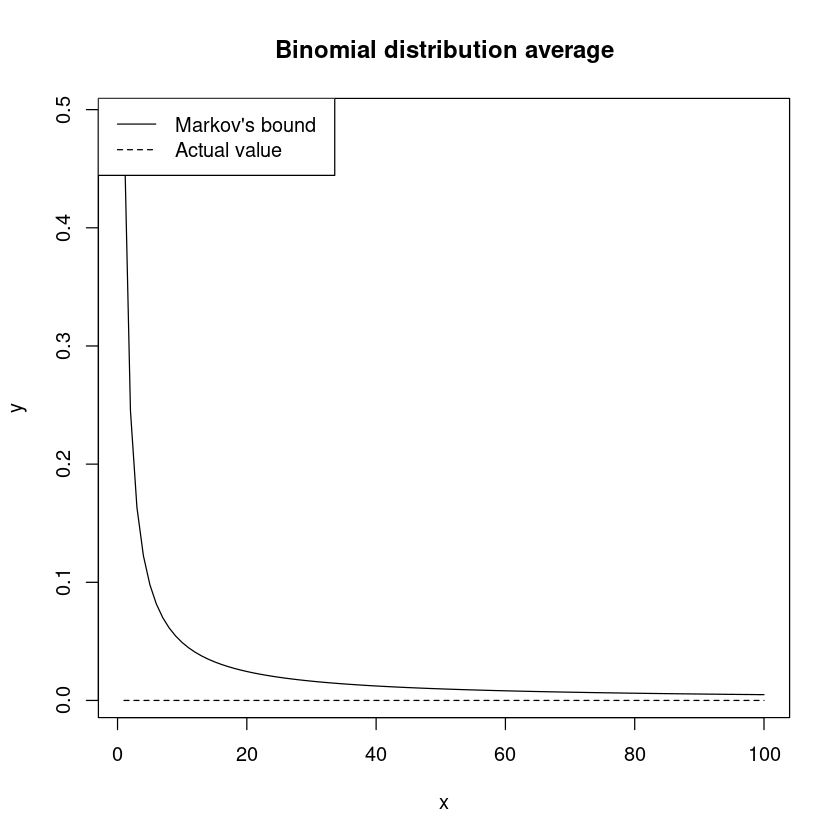

In [7]:
g_k <- function(x){1-pbinom(x,1,1/2)}
avg <- mean(rbinom(10000,1,1/2))
x <- seq(1:100)
y <- avg/x
plot(x, y, main = 'Binomial distribution average', lty = 1, type = 'l')
lines(x, g_k(x), lty = 2)
legend("topleft",legend = c("Markov's bound","Actual value"), lty =1:2)

### d) a Poisson, Pois(λ = 1/2), distribution function

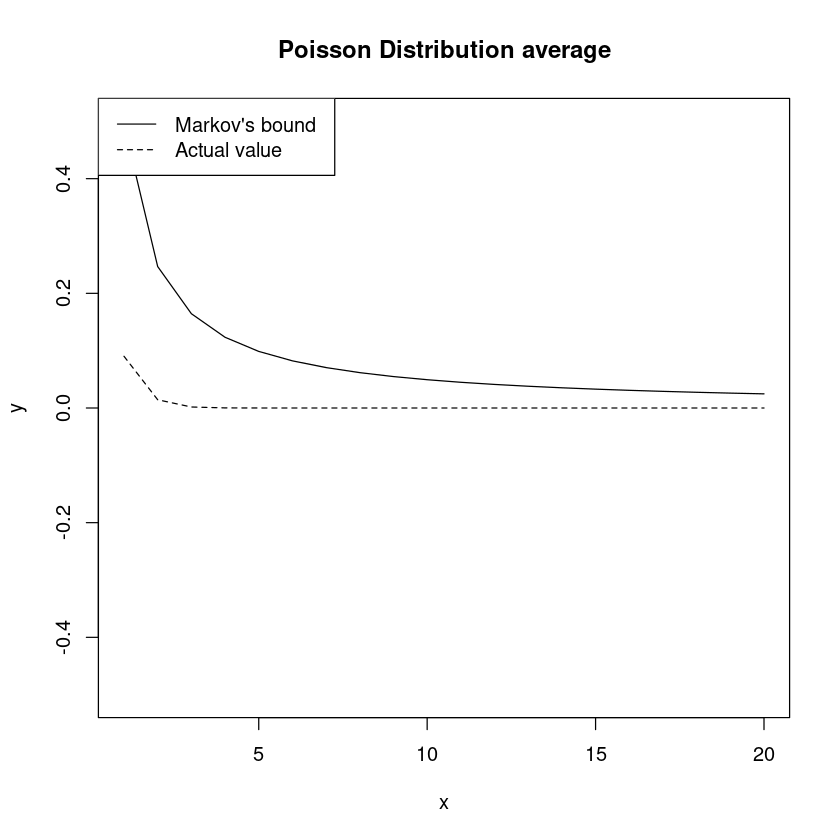

In [8]:
g_k <- function(x){1-ppois(x,1/2)}
avg <- mean(rpois(10000,1/2))
x <- seq(1:20)
y <- avg/x
plot(x, y, ylim = c(-0.5,0.5), main = 'Poisson Distribution average', type = 'l', lty = 1)
lines(x, g_k(x), lty = 2)
legend("topleft",legend = c("Markov's bound","Actual value"), lty =1:2)

## Exercise 3 - Chebysev's Inequality
Chebysev's inequality tells us that
$$
\begin{align}
P(|x-\mu|\ge k\sigma)\le \frac{1}{k^2}
\end{align}
$$
which can be rewritten as
$$
\begin{align}
P(|x-\mu|\lt k\sigma)\ge 1- \frac{1}{k^2}
\end{align}
$$
Use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to the following distributions:

### a) A normal distribution, $N(\mu = 3, \sigma = 5)$

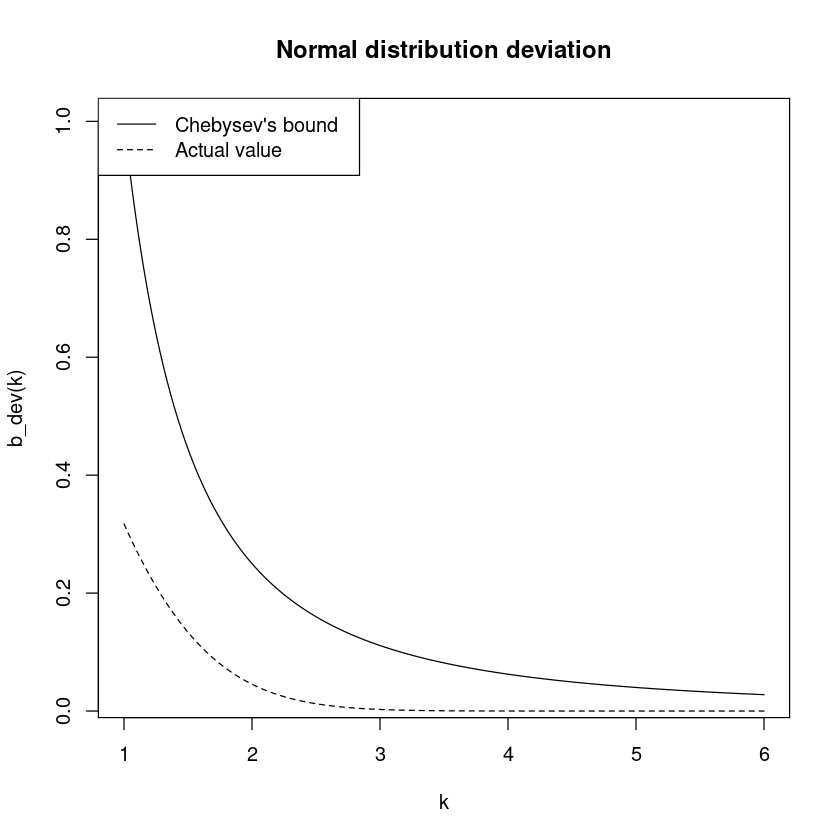

In [9]:
sig <- 5
mu <- 3
p_dev <- function(k){1-pnorm(mu+k*sig,mu,sig)+pnorm(mu-k*sig,mu,sig)}
b_dev <- function(k){1/k**2}
k<-seq(1,6,0.01)
plot(k,b_dev(k), main = 'Normal distribution deviation', type = 'l', lty = 1)
lines(k,p_dev(k), lty = 2)
legend("topleft",legend = c("Chebysev's bound","Actual value"), lty =1:2)

### b) An exponential distribution, $\text{Exp}(\lambda = 1)$

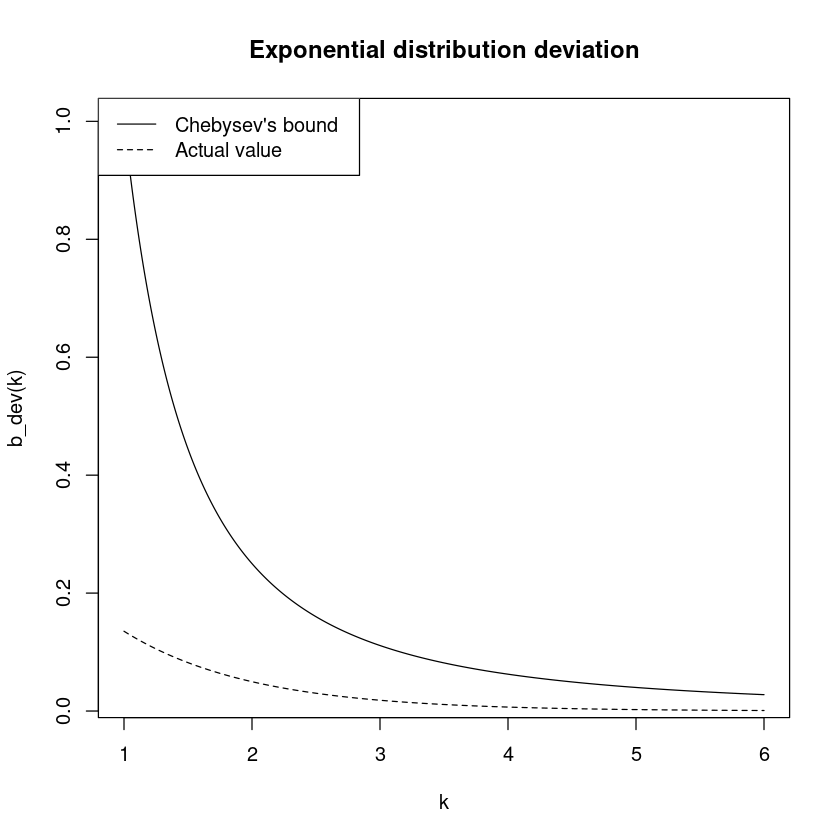

In [10]:
lambda = 1
mu = 1/lambda
sig = 1/lambda
p_dev<-function(k){1-pexp(mu+k*sig,lambda)+pexp(mu-k*sig,lambda)}
k<-seq(1,6,0.01)
plot(k,b_dev(k), main = 'Exponential distribution deviation', lty = 1, type = 'l')
lines(k,p_dev(k), lty = 2)
legend("topleft",legend = c("Chebysev's bound","Actual value"), lty =1:2)

### c) A uniform distribution $U\left(1 − \sqrt{2}, 1 + \sqrt{2}\right)$

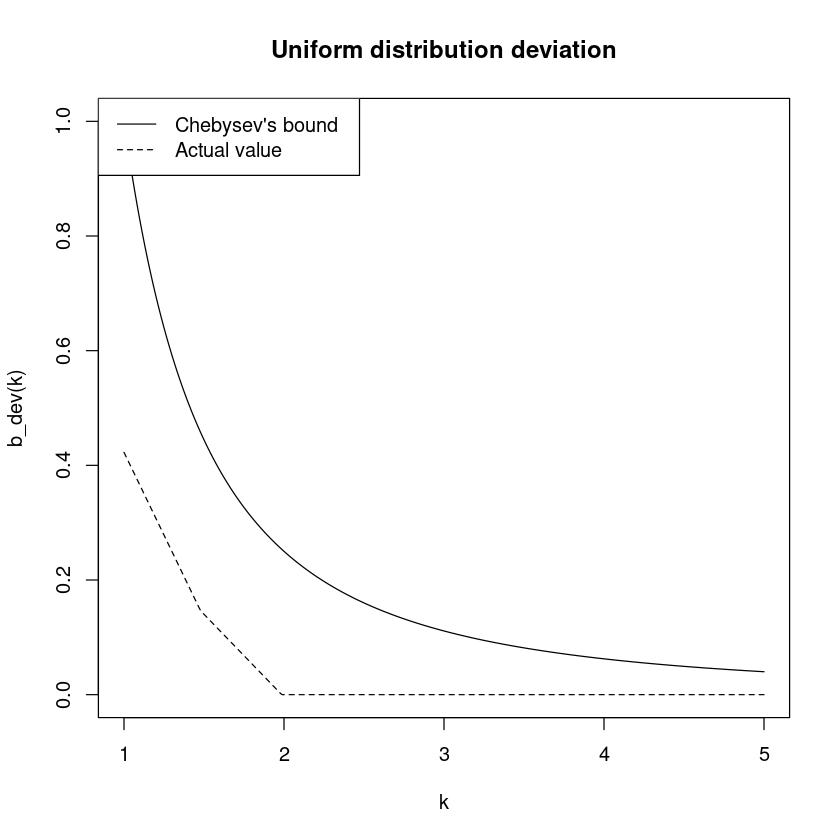

In [11]:
a = 1-sqrt(2)
b = 1+sqrt(2)
mu = a+b/2
sig = (b-a)/sqrt(12)
p_dev <- function(k){1-punif(mu+k*sig,a,b)+punif(mu-k*sig,a,b)}
k<-seq(1,5,0.01)
plot(k,b_dev(k), main = 'Uniform distribution deviation', type = 'l', lty = 1, ylim = c(0,1))
lines(k,p_dev(k), lty = 2)
legend("topleft",legend = c("Chebysev's bound","Actual value"), lty =1:2)

### d) A Poisson, $\text{Pois}(\lambda = 1/3)$, distribution function

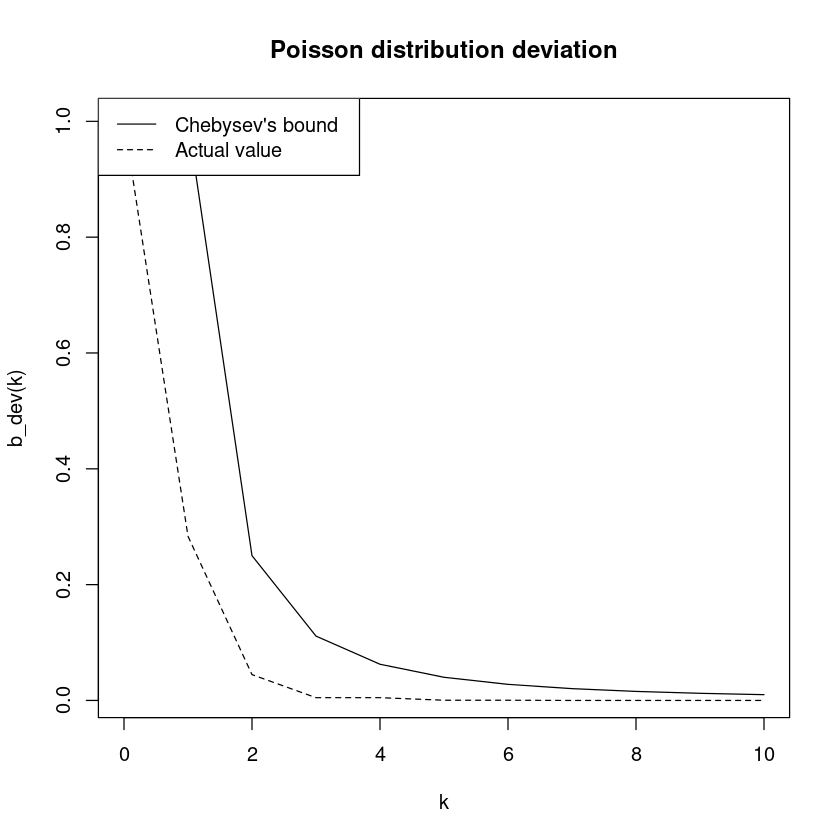

In [12]:
lambda = 1/3
mu = lambda
sig = sqrt(lambda)
p_dev <- function(k){1-ppois(mu+k*sig,lambda)+ppois(mu-k*sig,lambda)}
k <- 0:10
plot(k,b_dev(k), main = "Poisson distribution deviation", lty = 1, type = 'l')
lines(k,p_dev(k), lty = 2)
legend("topleft",legend = c("Chebysev's bound","Actual value"), lty =1:2)

## Exercise 4 - Community Mobility Open Data

In [13]:
library(tidyverse)
library(reshape2)
library(gridExtra)
library(repr)
library(ramify)
options(repr.plot.width=18, repr.plot.height=6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ramify’


The following object is masked from ‘package:purrr’:

    flatten


The following object is masked from ‘package:tidyr’:

    fill


The following object is masked from ‘package:graphics’:

    clip




In [14]:
data_world <- read_csv('Global_Mobility_Report.csv')
data_spain <- read_csv('Region_Mobility_Report_CSVs/2020_ES_Region_Mobility_Report.csv')
data_sweden <- read_csv('Region_Mobility_Report_CSVs/2020_SE_Region_Mobility_Report.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_logical(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  place_id = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)


Warning message:
“5403723 parsing failures.
 row        col           expected                  actual                         file
3864 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'Global_Mobility_Report.csv'
3865 metro

In [15]:
interest <- 9:15 # The columns we are interested in
whole_world <- drop_na(data_world[is.na(data_world$sub_region_1),interest])
whole_spain <- data_spain[is.na(data_spain$sub_region_1),interest]
whole_sweden <- data_sweden[is.na(data_sweden$sub_region_1),interest]
colnames(whole_world) <- c('date','retail', 'grocery', 'parks', 'transit', 'workplace', 'residential')
colnames(whole_spain) <- c('date','retail', 'grocery', 'parks', 'transit', 'workplace', 'residential')
colnames(whole_sweden) <- c('date','retail', 'grocery', 'parks', 'transit', 'workplace', 'residential')

In [16]:
impact_summary <- function(data){
    data_wod <- data[,c(-1)]
    idmaxs <- lapply(data_wod,which.max)
    idmins <- lapply(data_wod,which.min)
    maxs <- lapply(data_wod,max)
    mins <- lapply(data_wod,min)
    what_max <- colnames(data_wod)[which.max(t(maxs))]
    what_min <- colnames(data_wod)[which.min(t(mins))]
    when_max <- data$date[idmaxs[what_max][[1]]]
    when_min <- data$date[idmins[what_min][[1]]]
    message('The maximum relative increasement was seen in ', what_max, ' during ', when_max,". This date's increasement was ", maxs[what_max][[1]],'%.')
    message('The maximum relative decreasement was seen in ', what_min, ' during ', when_min,". This date's decreasement was ", -1*mins[what_min][[1]],'%.')
}
message('Impact in Spain')
impact_summary(whole_spain)
message()
message('Impact in Sweden')
impact_summary(whole_sweden)

Impact in Spain

The maximum relative increasement was seen in parks during 2020-08-10. This date's increasement was 86%.

The maximum relative decreasement was seen in retail during 2020-04-10. This date's decreasement was 96%.



Impact in Sweden

The maximum relative increasement was seen in parks during 2020-08-08. This date's increasement was 380%.

The maximum relative decreasement was seen in workplace during 2020-12-24. This date's decreasement was 85%.



In [17]:
# Function to generate the different plots
aggreg_evo_plot <- function(data, keys, FUN, idvar){
    keyy <- sym(idvar)
    agg_by_key <- aggregate(list(data[,c(-1)]), by = keys, FUN)
    df <- melt(agg_by_key,id.vars = idvar, variable.name= 'series')
    evo_plot <- ggplot(df, aes(!!keyy,value)) + geom_line(aes(colour = series))
    return(evo_plot)
}

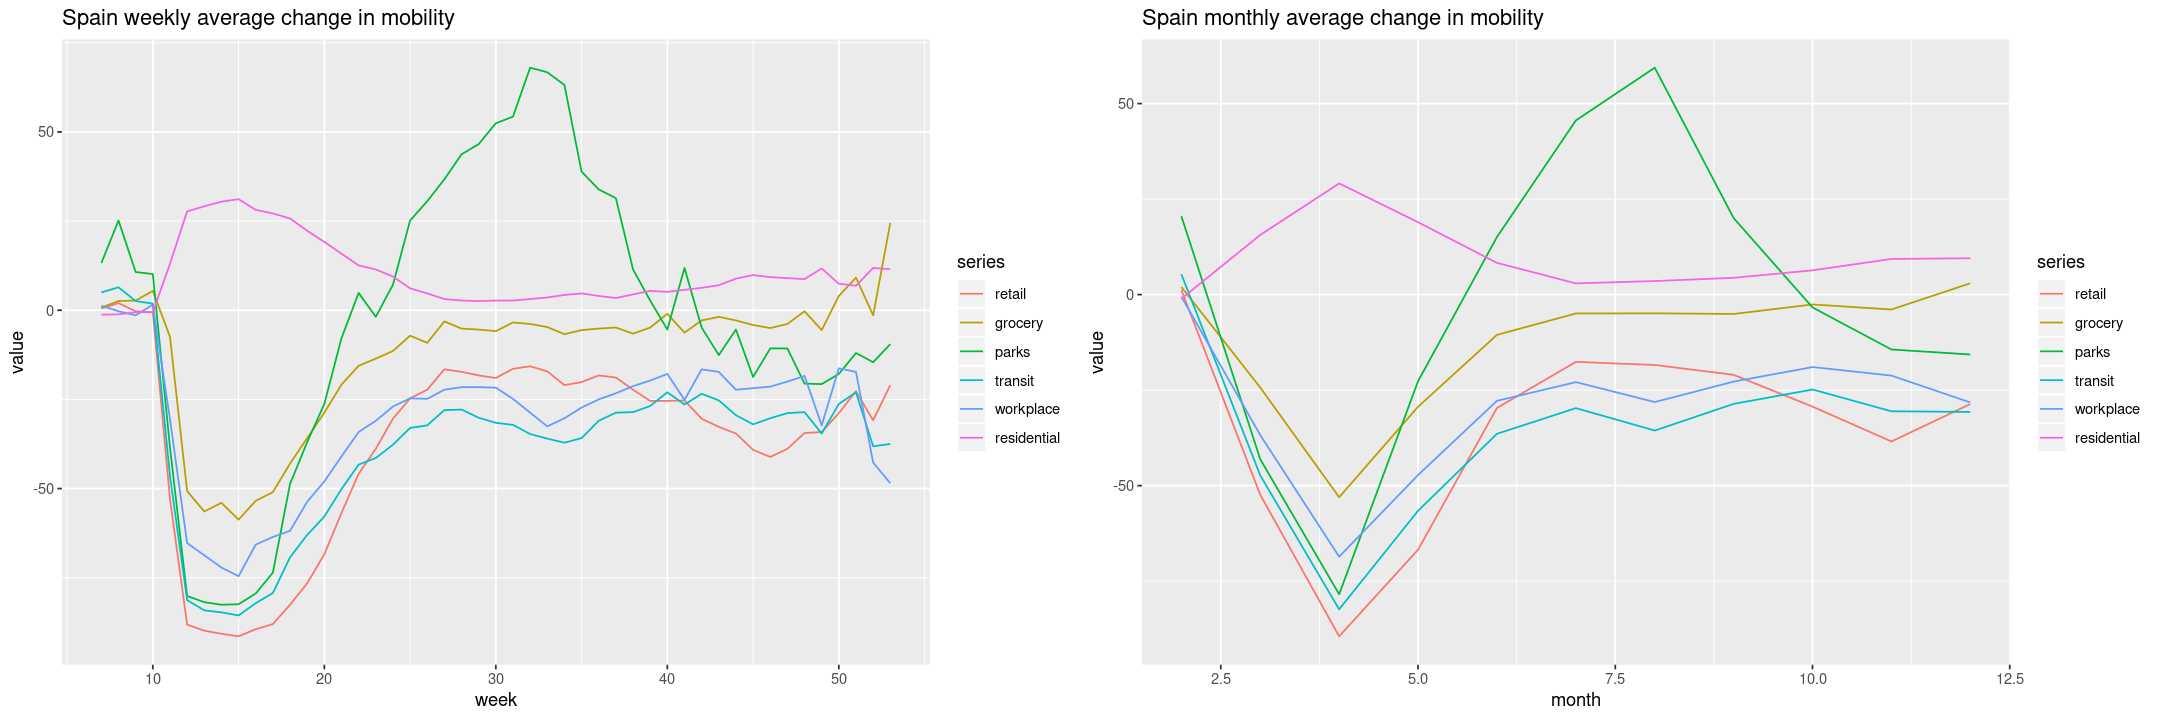

In [18]:
weeks <- list(week = lubridate::week(whole_spain$date))
week_plot <- aggreg_evo_plot(whole_spain,weeks,mean,'week')+ggtitle('Spain weekly average change in mobility')

months <- list(month = lubridate::month(whole_spain$date))
month_plot <- aggreg_evo_plot(whole_spain,months,mean,'month')+ggtitle('Spain monthly average change in mobility')

grid.arrange(week_plot,month_plot,ncol=2)

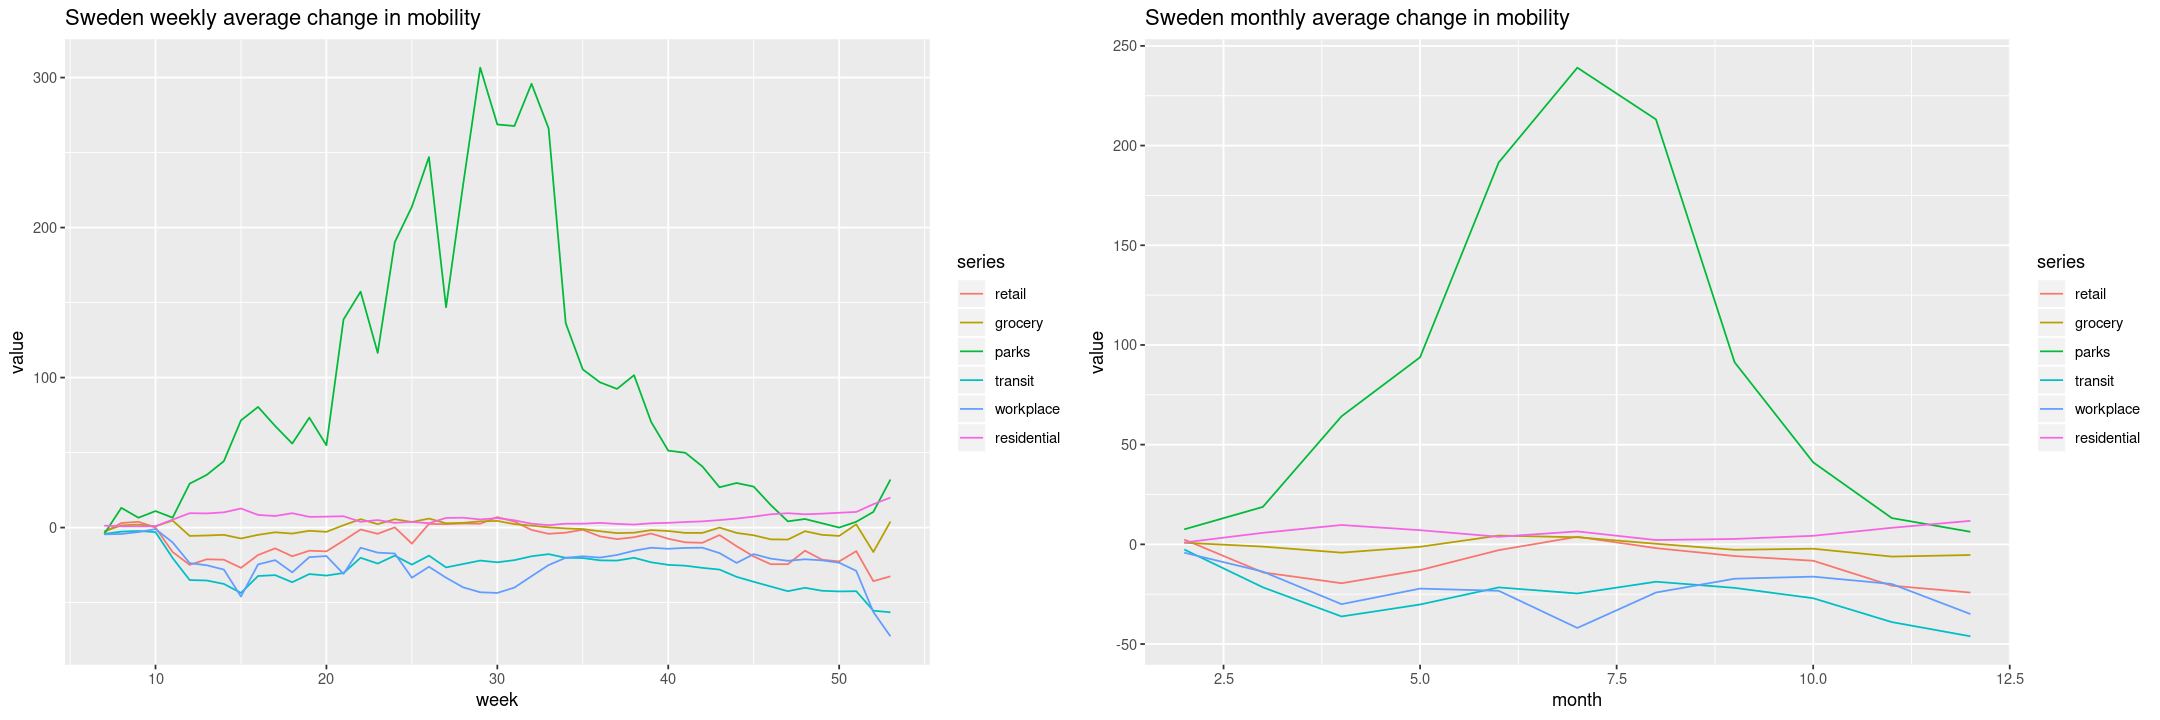

In [19]:
weeks <- list(week = lubridate::week(whole_sweden$date))
week_plot <- aggreg_evo_plot(whole_sweden,weeks,mean,'week')+ggtitle('Sweden weekly average change in mobility')

months <- list(month = lubridate::month(whole_sweden$date))
month_plot <- aggreg_evo_plot(whole_sweden,months,mean,'month')+ggtitle('Sweden monthly average change in mobility')

grid.arrange(week_plot,month_plot,ncol=2)

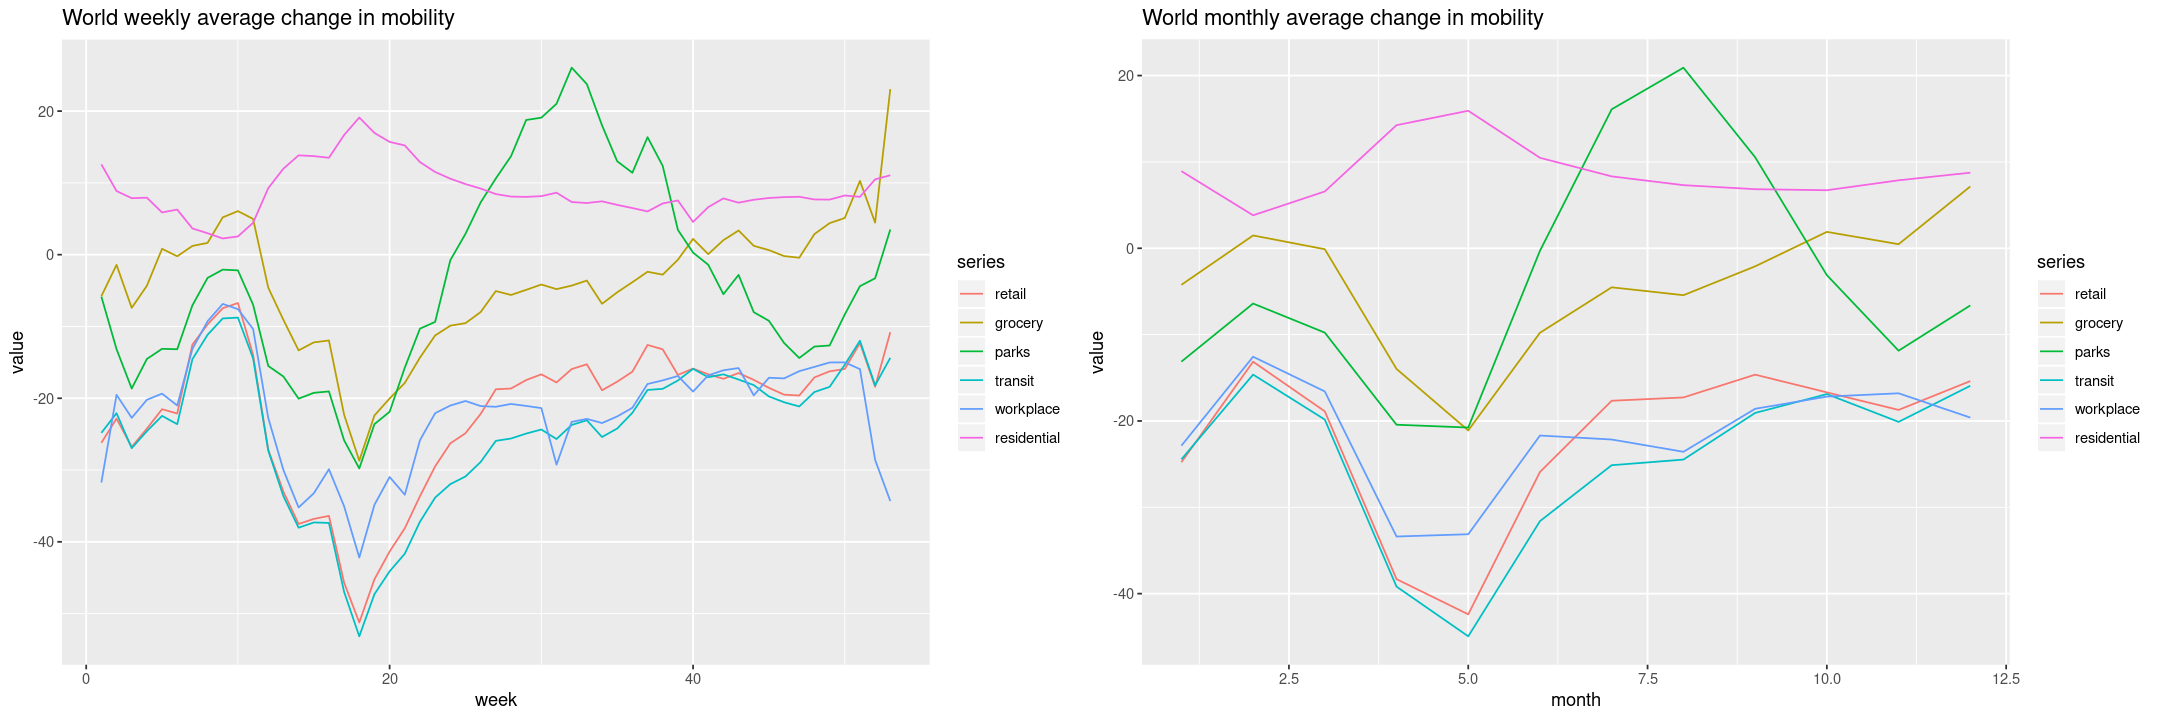

In [20]:
weeks <- list(week = lubridate::week(whole_world$date))
week_plot <- aggreg_evo_plot(whole_world,weeks,mean,'week')+ggtitle('World weekly average change in mobility')

months <- list(month = lubridate::month(whole_world$date))
month_plot <- aggreg_evo_plot(whole_world,months,mean,'month')+ggtitle('World monthly average change in mobility')

grid.arrange(week_plot,month_plot,ncol=2)